In [1]:
import sys
sys.path.append('../coding')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from analysis.information import AdaptationChannel
from analysis.plotting import pmf_plot

publication_directory = '../manuscript'

In [3]:
res_df = pd.read_pickle('../data/transition_rates.pkl')

efficiencies = {}

for ix, sub_df in res_df.groupby(level=[0,1,2]):
    channel = AdaptationChannel(sub_df.loc[ix])
    efficiencies[ix] = channel.obtain_efficiency(method='jimbo')
    print(ix)


efficiencies = pd.Series(efficiencies)

../coding/optimization/__init__.py:7: RuntimeWarning: invalid value encountered in true_divide
  specificity = sr_grid / prior


(0.0, 250, 'CH')
(0.0, 250, 'FS')
(0.0, 250, 'IB')
(0.0, 250, 'RS')
(0.0, 500, 'CH')
(0.0, 500, 'FS')
(0.0, 500, 'IB')
(0.0, 500, 'RS')
(0.0, 750, 'CH')
(0.0, 750, 'FS')
(0.0, 750, 'IB')
(0.0, 750, 'RS')
(0.0, 1000, 'CH')
(0.0, 1000, 'FS')
(0.0, 1000, 'IB')
(0.0, 1000, 'RS')
(0.20000000000000001, 250, 'CH')
(0.20000000000000001, 250, 'FS')
(0.20000000000000001, 250, 'IB')
(0.20000000000000001, 250, 'RS')
(0.20000000000000001, 500, 'CH')
(0.20000000000000001, 500, 'FS')
(0.20000000000000001, 500, 'IB')
(0.20000000000000001, 500, 'RS')
(0.20000000000000001, 750, 'CH')
(0.20000000000000001, 750, 'FS')
(0.20000000000000001, 750, 'IB')
(0.20000000000000001, 750, 'RS')
(0.20000000000000001, 1000, 'CH')
(0.20000000000000001, 1000, 'FS')
(0.20000000000000001, 1000, 'IB')
(0.20000000000000001, 1000, 'RS')
(0.40000000000000002, 250, 'CH')
(0.40000000000000002, 250, 'FS')
(0.40000000000000002, 250, 'IB')
(0.40000000000000002, 250, 'RS')
(0.40000000000000002, 500, 'CH')
(0.40000000000000002, 500, 

In [4]:
def qq_plot(ix1, ix2, ax):
    cdf1 = efficiencies.loc[ix1]['out_pdf'].cumsum()
    outs1 = np.arange(len(cdf1))
    f1 = interp1d(cdf1[:-2], outs1[:-2], kind='nearest', fill_value='extrapolate')
    
    cdf2 = efficiencies.loc[ix2]['out_pdf'].cumsum()
    outs2 = np.arange(len(cdf2))
    f2 = interp1d(cdf2[:-2], outs2[:-2], kind='nearest', fill_value='extrapolate')
    
    x = np.linspace(0, 1, 100000)

    percentiles1 = f1(x)
    percentiles2 = f2(x)
    
    a, b = np.polyfit(percentiles1, percentiles2, deg=1)
    
    ax.plot(percentiles1, a * percentiles1 + b, linestyle='dashed', c='red')
    ax.plot(f1(x), f2(x), lw=4)
    
    for side in ['right','top']:
        ax.spines[side].set_visible(False)
    
    ax.set_xlabel(ix1)
    ax.set_ylabel(ix2)

/Users/tomasbarta/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


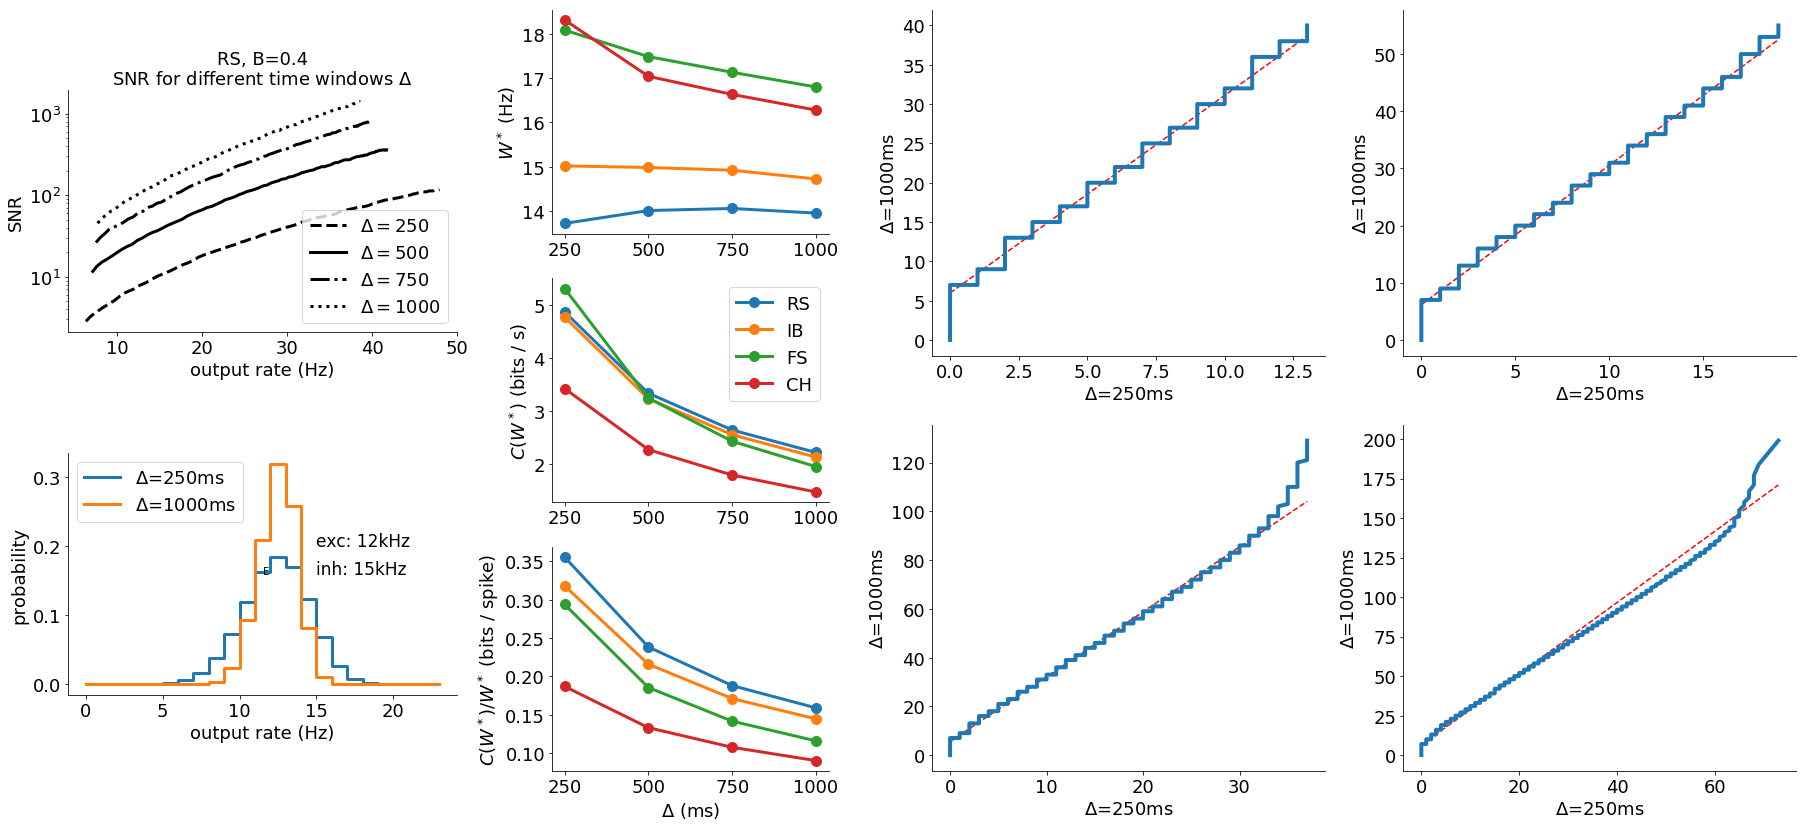

In [5]:
import matplotlib.gridspec as gridspec

neurons = ['RS','IB','FS','CH']

def rates_mu(rates):
    return rates.dot(np.arange(rates.shape[1]))

def rates_std(rates):
    mu = rates_mu(rates)
    
    outs = np.arange(rates.shape[1])
    
    std = np.sqrt(rates.dot(outs * outs) - mu ** 2)
    return std

mus = efficiencies.map(lambda x: x['rates']).map(rates_mu)
stds = efficiencies.map(lambda x: x['rates']).map(rates_std)


nname = 'RS'

fig = plt.figure(tight_layout=True, figsize=(24,14))

gs1 = gridspec.GridSpec(2,1, left=0, right=0.225, top=0.8, bottom=0.2, hspace=0.5)

# CAPACITY-COST

ax1 = plt.subplot(gs1[0])
ax2 = plt.subplot(gs1[1])

mus_RS = mus.swaplevel(0,1).loc[500].swaplevel(0,1).loc[nname]
stds_RS = stds.swaplevel(0,1).loc[500].swaplevel(0,1).loc[nname]

ax = ax1

# for B in [0, 0.2, 0.4, 0.6, 0.8, 1.0]:
#     ax.plot(mus_RS.loc[B] * 2, (mus_RS.loc[B] / stds_RS.loc[B]) ** 2, label=B, alpha=0.4, lw=3)

for side in ['right','top']:
    ax.spines[side].set_visible(False)


mus_RS = mus.loc[0.4].swaplevel(0,1).loc[nname]
stds_RS = stds.loc[0.4].swaplevel(0,1).loc[nname]

linestyles = ['--','-','-.',':']

time_windows = [250, 500, 750, 1000]
lines = []

for tw, linestyle in zip(time_windows, linestyles):
    line, = ax.plot(mus_RS.loc[tw] * 1000 / tw, (mus_RS.loc[tw] / stds_RS.loc[tw]) ** (2),
        label=tw, linestyle=linestyle, c='black', lw=3)
    lines.append(line)

# ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(lines, [r'$\Delta=$' + str(tw) for tw in time_windows])
ax.set_xlabel('output rate (Hz)')
ax.set_ylabel('SNR');
ax.set_title('RS, B=0.4\nSNR for different time windows $\Delta$')

xlim = ax.get_xlim()
ax.set_xlim(xlim[0], 50)

# ax1.set_xticks([10,100])
# ax1.set_xticklabels(['$\\mathdefault{10^{1}}$', '$\\mathdefault{10^{2}}$'])

ax = ax2

n_outputs = 24
outs = np.arange(n_outputs)
out250 = (res_df[0.4, 250, 'RS'] * efficiencies[0.4, 1000, 'RS']['pdf']).sum()
out250250 = np.convolve(out250[10], out250[10], mode='full')
out250250 = np.convolve(out250250, out250250, mode='full')[:n_outputs]
out500 = (res_df[0.4, 1000, 'RS'] * efficiencies[0.4, 1000, 'RS']['pdf']).sum()[10,:n_outputs]

ax.step(outs, out250250, label=r'$\Delta$=250ms', lw=3)
ax.step(outs, out500, label=r'$\Delta$=1000ms', lw=3)
ax.set_xlabel('output rate (Hz)')
ax.set_ylabel('probability');
ax.text(x=15, y=0.2, s='exc: 12kHz', fontsize=17)
ax.text(x=15, y=0.16, s='inh: 15kHz', fontsize=17)
ax.legend()

for side in ['right','top']:
    ax.spines[side].set_visible(False)

gs2 = gridspec.GridSpec(3,1, left=0.28, right=0.44)
    
# PRVNI RADEK - KAPACITA

table = efficiencies.loc[0.4].map(lambda x: x['fun']).unstack()[neurons]
table = table.multiply(1000 / table.index.get_level_values(0), 'index')

ax1 = plt.subplot(gs2[1])
table.plot(marker='o', ax=ax1, legend=True, lw=3, ms=10)
ax1.set_ylabel(r'$C(W^*)$ (bits / s)')

# DRUHY RADEK - MEAN PSFR

table = efficiencies.loc[0.4].map(lambda x: x['expense']).unstack()[neurons]
table = table.multiply(1000 / table.index.get_level_values(0), 'index')

ax2 = plt.subplot(gs2[0])
table.plot(marker='o', ax=ax2, legend=False, lw=3, ms=10)
ax2.set_ylabel(r'$W^*$ (Hz)')

# TRETI RADEK - EFFICIENCY

table = efficiencies.loc[0.4].map(lambda x: x['fun'] / x['expense']).unstack()[neurons]

ax3 = plt.subplot(gs2[2])
table.plot(marker='o', ax=ax3, legend=False, lw=3, ms=10)
ax3.set_ylabel(r'$C(W^*)/W^*$ (bits / spike)')
ax3.set_xlabel(r'$\Delta$ (ms)')
ax3.text(0.5, 0.5, 'E', transform=ax.transAxes)

for ax in [ax1, ax2, ax3]:
    for side in ['right','top']:
        ax.spines[side].set_visible(False)
        ax.set_xticks([250, 500, 750, 1000])

gs = gridspec.GridSpec(2,2, left=0.5, right=1)

tw1 = 250
tw2 = 1000

ax = plt.subplot(gs[0,0])
qq_plot((0.4, tw1, 'RS'), (0.4, tw2, 'RS'), ax=ax)
ax.set_xlabel(r'$\Delta$=250ms')
ax.set_ylabel(r'$\Delta$=1000ms')
ax = plt.subplot(gs[0,1])
qq_plot((0.4, tw1, 'IB'), (0.4, tw2, 'IB'), ax=ax)
ax.set_xlabel(r'$\Delta$=250ms')
ax.set_ylabel(r'$\Delta$=1000ms')
ax = plt.subplot(gs[1,0])
qq_plot((0.4, tw1, 'FS'), (0.4, tw2, 'FS'), ax=ax)
ax.set_xlabel(r'$\Delta$=250ms')
ax.set_ylabel(r'$\Delta$=1000ms')
ax = plt.subplot(gs[1,1])
qq_plot((0.4, tw1, 'CH'), (0.4, tw2, 'CH'), ax=ax)
ax.set_xlabel(r'$\Delta$=250ms')
ax.set_ylabel(r'$\Delta$=1000ms')

fig.tight_layout()
# plt.savefig(f'{publication_directory}/img/snr_time.pdf', bbox_inches='tight')